<a href="https://colab.research.google.com/github/Puru35/Black-Friday-Sales-Prediction/blob/master/Black_Friday_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization

This is the **Second** notebook, which focuses on data visualization and deriving insights from them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Since this is notebook is only for visualization, we will make use of the original "train" dataset, as we may need the text data present in few of the features.

In [0]:
data1=pd.read_csv("train.csv")

In [3]:
data1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
for feature in data1.drop(["User_ID","Product_ID","Purchase"], axis = 1).columns:
  print("\n\n", feature, "\n", sep="")
  print(data1[feature].value_counts())
  print("-"*15)     



Gender

M    414259
F    135809
Name: Gender, dtype: int64
---------------


Age

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
---------------


Occupation

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
---------------


City_Category

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
---------------


Stay_In_Current_City_Years

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
---------------


Marital_Status

0    324731
1    225337
Name: Marital_Status, dtype: int64
---------------


Product_Category_1

5     150933
1     140378
8     113925
11     24287
2      23864
6      204

In [5]:
print(f'Total unique users buying items are : {data1["User_ID"].nunique()}')
print(f'Total unique items being bought are : {data1["Product_ID"].nunique()}')

Total unique users buying items are : 5891
Total unique items being bought are : 3631


We observe that even though there are 5.5 Lakh rows, there are only 5,891 buyers, and only 3,631 different products. 

# Univariate and Bivariate analysis of features.


Here, we will compare every necessary feature to see the total count of the different values in that feature, and comapre that feature with the target feature "Purchase". In some cases we will compare two different features, not including target as well to see if there is any information we can get out of that relationship. 

##1. Gender Analysis

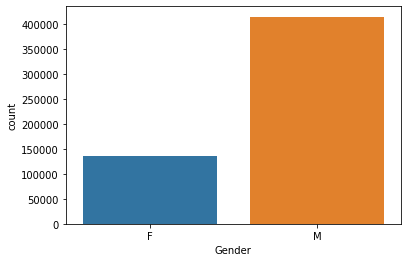

In [6]:
sns.countplot('Gender', data = data1)
plt.show()

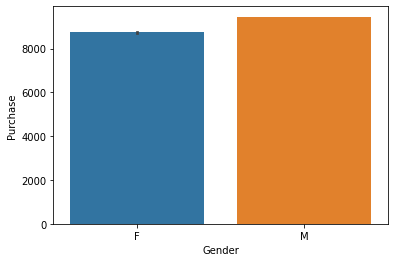

In [7]:
sns.barplot('Gender', 'Purchase', data = data1)
plt.show()

In the Gender analysis, we observe that the number of men buying items is almost 3 times that of women. But, when we compare to the target, we see that both genders have almost equal buying capacity.

## 2. Age Analysis

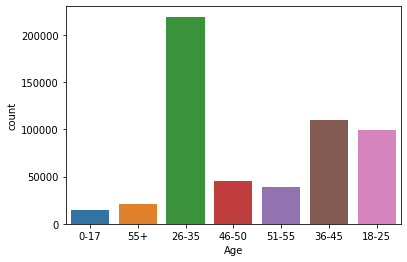

In [8]:
sns.countplot('Age', data = data1)
plt.show()

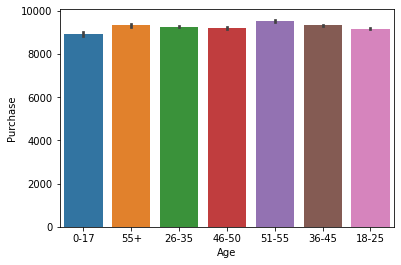

In [9]:
sns.barplot('Age', 'Purchase', data = data1)
plt.show()

In the Age analysis, we see that most buyers are in the range of 26 to 35, followed by 36 to 45. We can conclude that most of the people buying, are people of working class. But as we see in the bivariate analysis, just as in gender, the spending capacity for each age group is almost the same.

Just out of curiosity, let us check which gender in thse top two age groups, is more.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


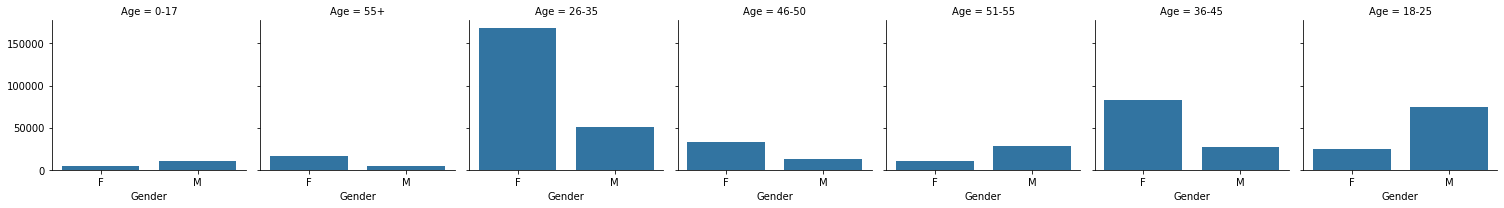

In [10]:
sns.FacetGrid(data1,col="Age").map(sns.countplot, "Gender")

If we observe, in both cases, i.e. 26 to 35, and 36 to 45, it is clear to us that more number of women tend to buy items than men. 

But in the range of 18 to 25, the are more number of men. We can conclude that among students, the are more male buyers than female.

##3. Occupation Analysis

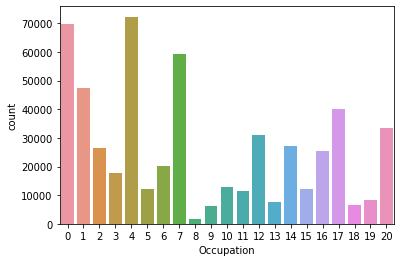

In [11]:
sns.countplot('Occupation', data = data1)
plt.show()

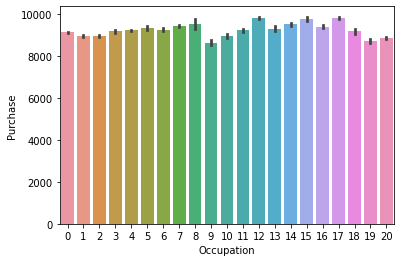

In [12]:
sns.barplot('Occupation', 'Purchase', data = data1)
plt.show()

In the Occupation analysis, we observe that there are more number of people in occupations, 4, 7, and 0. But as seen before, buying capacity is more or less the same for each occupation.

Let us also compare occupation and age, just to see if we can get any insights from it.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


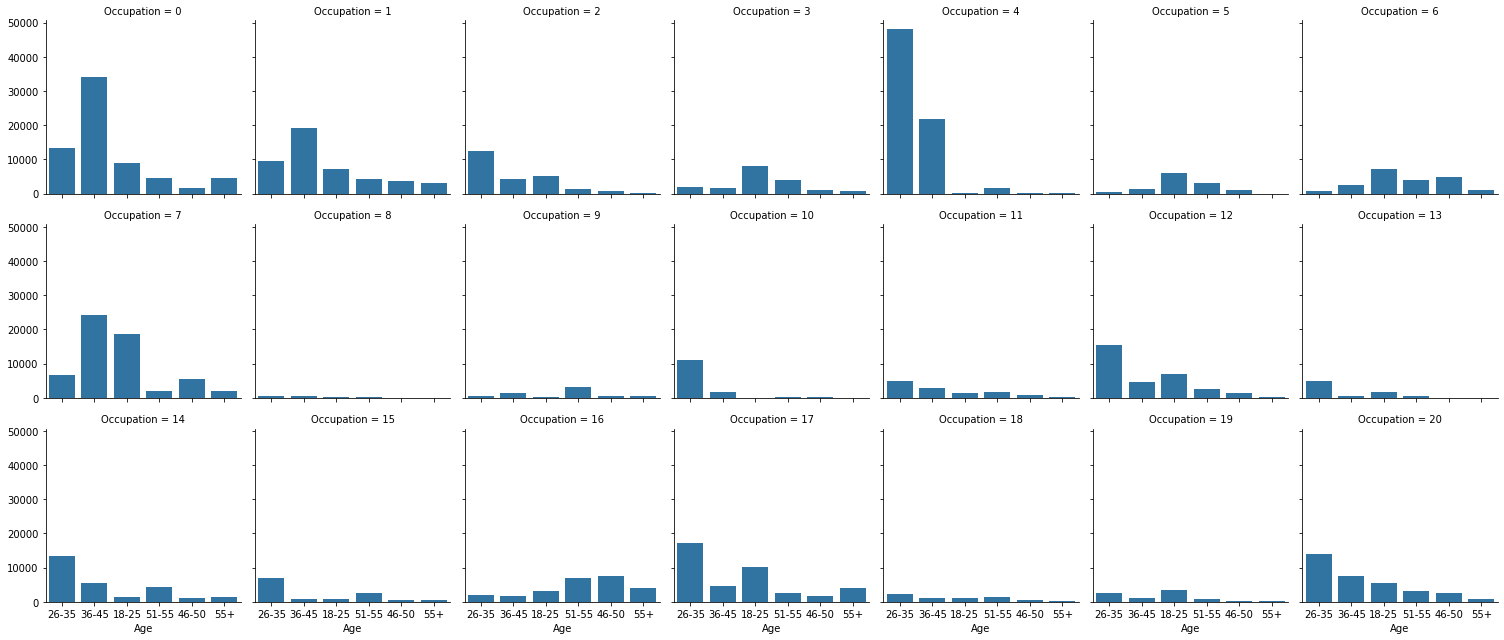

In [13]:
sns.FacetGrid(data1,col="Occupation",col_wrap = 7, height = 3).map(sns.countplot, "Age")

If we observe, the Occupations which had the most count, that is 0, 4 and 7, we see that most number of people working these jobs are of the age category 26 to 35 and 36 to 45. This tells us that majority of the people that are buying, fall under these three occupations.

## 4. City Category Analysis

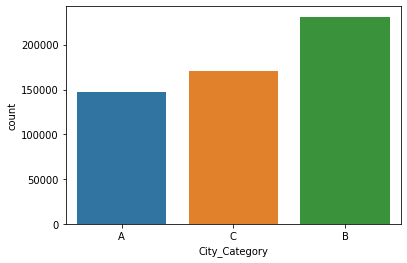

In [14]:
sns.countplot('City_Category', data = data1)
plt.show()

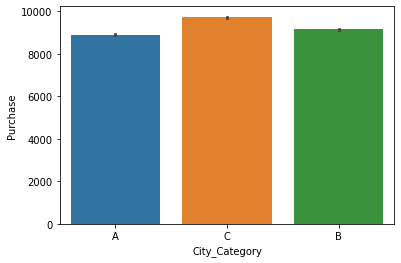

In [15]:
sns.barplot('City_Category', 'Purchase', data = data1)
plt.show()

In City Category analysis, we see that most of the people live in city B, while A has the least number of people. But when compared to the target, we see that city C has the best purchasing capacity of the 3 cities.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


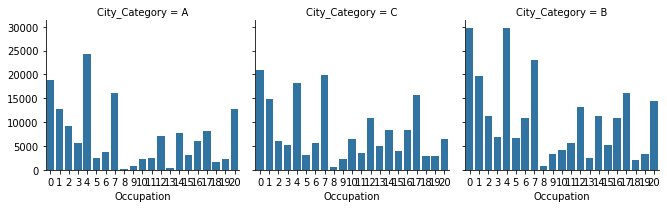

In [16]:
sns.FacetGrid(data1,col="City_Category",col_wrap = 7, height = 3).map(sns.countplot, "Occupation")

We also observe that most of the jobs are in city B. This also means that City C, although having lesser population and jobs, has same purchasing power as that of city B. Assuming that each occupation pays the same in each city, we can assume that City C has a good per capita income.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


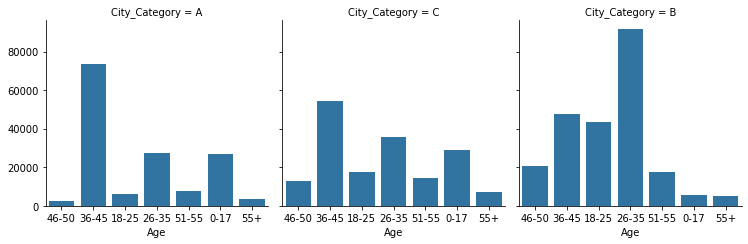

In [17]:
sns.FacetGrid(data1,col="City_Category",col_wrap = 3, height = 3.5).map(sns.countplot, "Age")

Here we also observe that In City C, the population is not too extreme towards and age range. Maybe this factors into the fact that the per capita income is more??

## 5. Number of years residing in that city

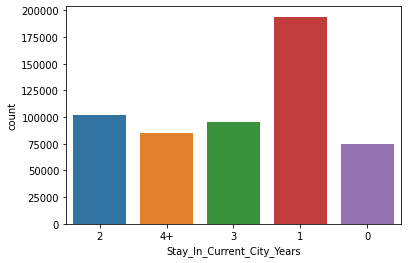

In [18]:
sns.countplot('Stay_In_Current_City_Years', data = data1)
plt.show()

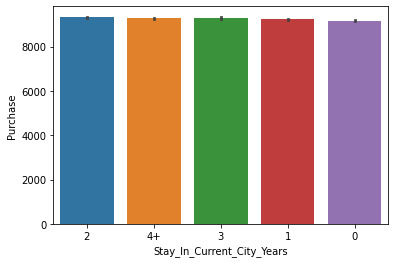

In [19]:
sns.barplot('Stay_In_Current_City_Years', 'Purchase', data = data1)
plt.show()

In the analysis of the Number of years residing in a particular city, we see that most people have lived for only 1 year, while the rest of the people have split across the remaining numer of years. But similar to the previous analysis, purchasing power is the same accross the number of years residing in the city.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


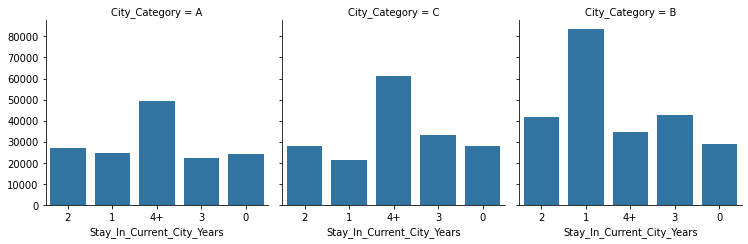

In [20]:
sns.FacetGrid(data1,col="City_Category",col_wrap = 3, height = 3.5).map(sns.countplot, "Stay_In_Current_City_Years")

In the above comparison, we see that most of the people in City A and City C have been there well over 4 years. But most of the people in City B have been there for jusgt a single year. Does this mean that City A and C are places where people are more liekly to settle down in? 

We also observed that most of the jobs are present in City B. Does this mean that people are more likely to stay in City B due yo the fact that there are more job opportunities??

## 6. Marital Status Analysis

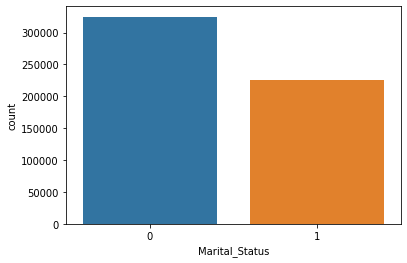

In [21]:
sns.countplot('Marital_Status', data = data1)
plt.show()

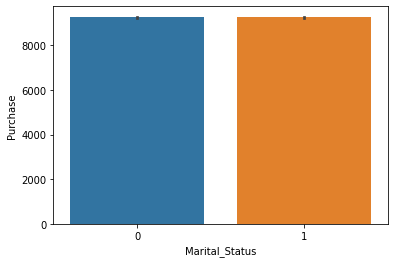

In [22]:
sns.barplot('Marital_Status', 'Purchase', data = data1)
plt.show()

In the marital status analysis, we see that most of the people are single. But as usual, this does not affect their purchasaing capacity even slightly.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


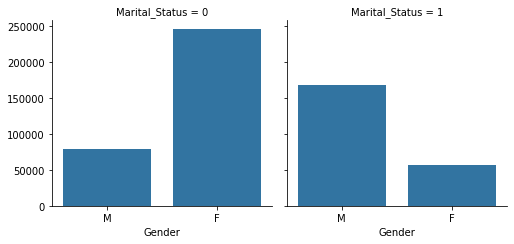

In [23]:
sns.FacetGrid(data1,col="Marital_Status",col_wrap = 3, height = 3.5).map(sns.countplot, "Gender")

By comparing marital status to gender, we see that most women are single, while most men are married.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


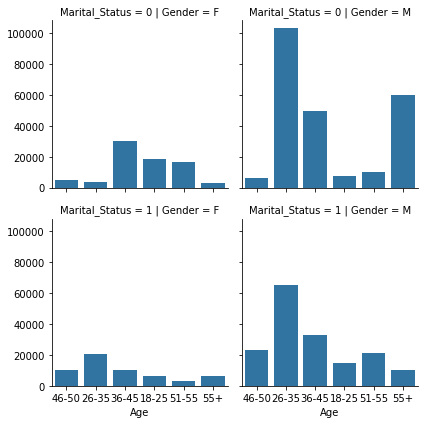

In [24]:
sns.FacetGrid(data1,col="Gender",row = "Marital_Status").map(sns.countplot, "Age")

We can also see that in the female category, most buyers that are single fall under the 36 to 45 category, while married buyers are in the range of 26 to 35.

In the male category, we see that most of both single and married buyers are in the age group of 26 to 35, while the second highest number of single men to purchase items fall under 55+ years of age.

## 7. Product Category 1 Analysis

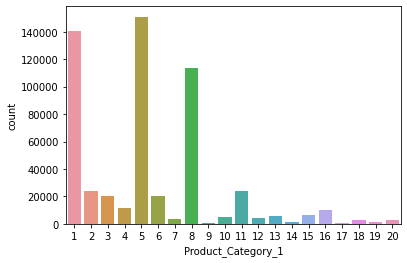

In [25]:
sns.countplot('Product_Category_1', data = data1)
plt.show()

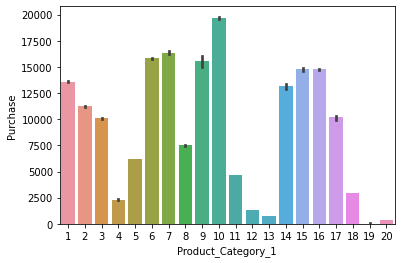

In [26]:
sns.barplot('Product_Category_1', 'Purchase', data = data1)
plt.show()

In Product category: 1, we see that the most number of bought items were products of category 1, 5 and 8. But when compared to the target, the items in the 10th category were the costliest.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


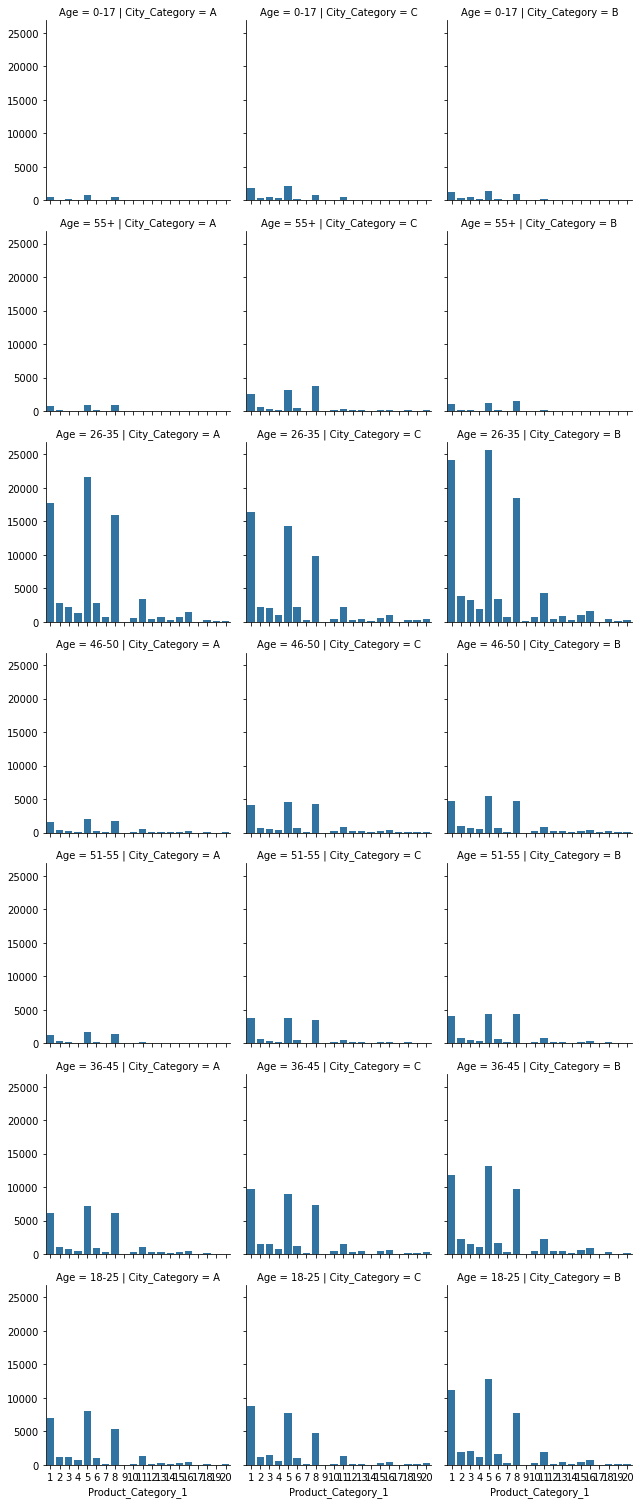

In [27]:
sns.FacetGrid(data1,col="City_Category",row = "Age").map(sns.countplot, "Product_Category_1")

We observe that across all age groups, item category 1, 5 and 8 are common throughout. We can assume from this that products falling under these categories are a common ncessity for all ages.

## 8. Product Category 2 Analysis

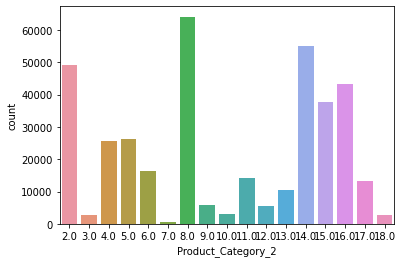

In [28]:
sns.countplot('Product_Category_2', data = data1)
plt.show()

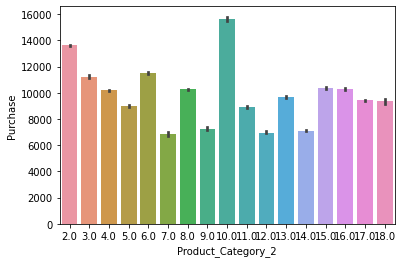

In [29]:
sns.barplot('Product_Category_2', 'Purchase', data = data1)
plt.show()

In Product category: 2, we see that categories 2.0, 8.0 and 14.0 have been bought multiple times. but when compared to the target, we see that category 10.0 is the costliest, while category 2.0 is the second costliest. This might mean that even though category 2.0 items are pretty costly, either they are necessary, or have dropped a considerable amount in the black friday sale for people to consider buying it.

## 9. Product Category 3 Analysis

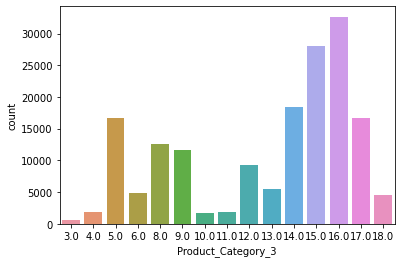

In [30]:
sns.countplot('Product_Category_3', data = data1)
plt.show()

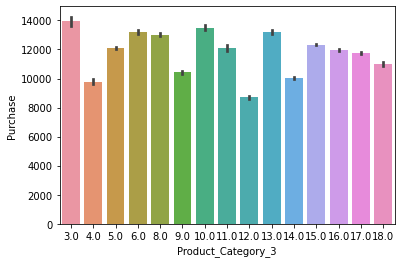

In [31]:
sns.barplot('Product_Category_3', 'Purchase', data = data1)
plt.show()

In product category: 3, we see that categories 16.0 and 15.0 are the most bought, while in comparison to purchase, category 3.0 is most costliest.

# Summary of Visualization

After a long process of visualization, we can come to the following conclusions:

* Most of the Black Friday Buyers are Male.
* The age group under which most of the buyers fall is 26 to 45 years of age.
* There are more number of male student buyers than female students.
* Majority of the people fall under the Occupation category of either 0, 4, or 7.
* City C has the best purchasing capacity, while also having a better per capita income compared to the other 2 cities.
* Most number of buyers have lived in their respective cities for 1 year.
* But Most of the people in City A and C have lived there for 4 or more years, while most people in City B have stayed there for 1 year.
* Majority of the buyers are single, and there are more single women than single men.





Please refer **Black Friday Model Training** notebook for the 3rd and final part of this project.